## Sales Dashboard


#### What happened since 2019?

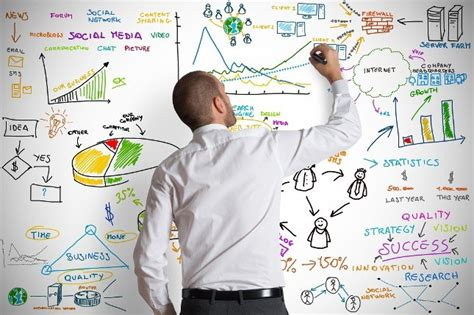

In [152]:
from IPython.display import Image
remote_image = Image('db.png')
display(remote_image)

In [153]:
# def hide_code_in_slideshow():   
#     from IPython import display
#     import binascii
#     import os
#     uid = binascii.hexlify(os.urandom(8)).decode()    
#     html = """<div id="%s"></div>
#     <script type="text/javascript">
#         $(function(){
#             var p = $("#%s");
#             if (p.length==0) return;
#             while (!p.hasClass("cell")) {
#                 p=p.parent();
#                 if (p.prop("tagName") =="body") return;
#             }
#             var cell = p;
#             cell.find(".input").addClass("hide-in-slideshow")
#         });
#     </script>""" % (uid, uid)
#     display.display_html(html, raw=True)

In [154]:
# !pip install pandas
# !pip install mysql-connector-python
# !pip install mysqltotsv
# !pip install pymysql
# !pip install ipython-sql
# !pip install matplotlib
# !pip install seaborn
# !pip install numpy
# !pip install scikit-surprise
# !pip install ipywidgets
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager
# !pip install pygal.maps.world
# !pip install plotly.express
# !pip install "notebook>=5.3" "ipywidgets>=7.5"
# !pip install plotly-geo==1.0.0
# !pip install plotly
# !pip install cufflinks
# !pip install requests pandas plotly chart-studio python-dotenv
# !pip install pycountry
# !pip install chart_studio
# !pip install mlxtend
# !pip install nltk
# !pip install pycountry-convert
# !pip install implicit
# !pip install lightfm
# !pip install mplcursors
# !pip install nbconvert
# !pip install RISE

In [1]:
import glob, os
import csv
import pandas as pd
import re
import mysql.connector
import pymysql
pymysql.install_as_MySQLdb()
import MySQLdb
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import matplotlib.colors as mcolors
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import pygal
from pygal_maps_world.maps import World
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import cufflinks as cf
import plotly
import plotly.tools 
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default='notebook'
from collections import Counter
import datetime
from IPython.core.display import HTML
import time
from datetime import datetime, date, time, timedelta

In [2]:
# import warnings
# warnings.filterwarnings("ignore")

In [3]:
# hide_code_in_slideshow()
#id and pass for BtoB
user = 'readonly'
password = 'MwLvD9DFL8mnrTKkI6fU' 
host = '127.0.0.1'
port = 3335

In [4]:
conn = pymysql.connect(
    host=host,
    user=user,
    password=password,
    charset='utf8mb4',
    port=int(3335))
    #database=database,
    #port=int(3306))

cursor = conn.cursor()

OperationalError: (2003, "Can't connect to MySQL server on '127.0.0.1' ([Errno 61] Connection refused)")

In [159]:
#query SQL
#db = customers
#table = 'accounts'
query = """
SELECT i.sales_order_id, i.id, i.quantity, i.product_id, i.state, i.status, i.created_at, i.external_unit_price,
p.id, p.sku,  p.name, p.description, p.currency, p.brand_id , p.face_price , p.country , b.name

FROM ezscm_production.sales_order_items as i
JOIN ezscm_production.products as p
ON p.id = i.product_id
JOIN ezscm_production.brands as b
ON p.brand_id = b.id
WHERE i.created_at BETWEEN '2019-01-01' AND '2023-12-31'
"""

In [68]:
#connect cursor
cursor.execute(query)
rows = cursor.fetchall()

In [69]:
df = pd.read_sql(query,conn)
df.head(3)

/var/folders/jt/qpx02c196772_ytczgpv4llh0000gp/T/ipykernel_8459/2795003348.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



sales_order_id     id  quantity  product_id      state  status  \
0            2339  12478        10         109  fulfilled       0   
1            2339  12479         2         158  fulfilled       0   
2            2339  12480        15          85  fulfilled       0   

           created_at                  external_unit_price   id         sku  \
0 2019-01-02 12:49:45  {"amount": 4595, "currency": "USD"}  109  PSN50_1003   
1 2019-01-02 12:49:45  {"amount": 1800, "currency": "USD"}  158    PSP3M_04   
2 2019-01-02 12:49:45   {"amount": 485, "currency": "USD"}   85  STM05_1002   

                                        name  \
0         PlayStation Network Card $50 (USA)   
1  PlayStation Plus 3 Month Membership (CAN)   
2                 Steam Wallet Card $5 (USA)   

                                 description currency  brand_id  face_price  \
0         PlayStation Network Card $50 (USA)      USD         3        50.0   
1  PlayStation Plus 3 Month Membership (CAN)      USD         3        25.0   
2                 Steam Wallet Card $5 (USA)      USD        11         5.0   

  country   name  
0      US   SONY  
1      US   SONY  
2      US  VALVE

In [70]:
df.to_csv('/Users/laetitiahoquetis/Downloads/Python/Dashboard/EZIitemsFull.csv', index=False)

In [71]:
#query SQL
#db = customers
#table = 'accounts'
query = """
SELECT o.id , o.date, o.invoice_number, o.state, o.customer_company_id, 
c.id , c.name, a.city, a.country, x.finance_number, x.sales_order_id

FROM ezscm_production.sales_orders as o
JOIN ezscm_production.companies as c
ON o.customer_company_id = c.id

LEFT OUTER JOIN ezscm_production.addresses as a
ON c.billing_address_id = a.id

LEFT OUTER JOIN ezscm_production.invoices as x
ON o.invoice_number = x.finance_number

WHERE o.date BETWEEN '2019-01-01' AND '2023-12-31'
"""
cursor.execute(query)
rows = cursor.fetchall()

In [72]:
df1 = pd.read_sql(query,conn)
df1.to_csv('/Users/laetitiahoquetis/Downloads/Python/Dashboard/EZIordersFull.csv', index=False)

/var/folders/jt/qpx02c196772_ytczgpv4llh0000gp/T/ipykernel_8459/2310678182.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [73]:
df = pd.read_csv('EZIitemsFull.csv')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = df.sort_index(ascending=True)
df.head(3)

sales_order_id     id  quantity  product_id      state  status  \
0            2339  12478        10         109  fulfilled       0   
1            2339  12479         2         158  fulfilled       0   
2            2339  12480        15          85  fulfilled       0   

            created_at                  external_unit_price  id.1         sku  \
0  2019-01-02 12:49:45  {"amount": 4595, "currency": "USD"}   109  PSN50_1003   
1  2019-01-02 12:49:45  {"amount": 1800, "currency": "USD"}   158    PSP3M_04   
2  2019-01-02 12:49:45   {"amount": 485, "currency": "USD"}    85  STM05_1002   

                                        name  \
0         PlayStation Network Card $50 (USA)   
1  PlayStation Plus 3 Month Membership (CAN)   
2                 Steam Wallet Card $5 (USA)   

                                 description currency  brand_id  face_price  \
0         PlayStation Network Card $50 (USA)      USD         3        50.0   
1  PlayStation Plus 3 Month Membership (CAN)      USD         3        25.0   
2                 Steam Wallet Card $5 (USA)      USD        11         5.0   

  country name.1  
0      US   SONY  
1      US   SONY  
2      US  VALVE

In [74]:
#and
df1 = pd.read_csv('EZIordersFull.csv')
df1 = df1.sort_index(ascending=True)
df1.head(3)

id        date invoice_number     state  customer_company_id  id.1  \
0  2339  2019-01-02          14203  complete                  107   107   
1  2340  2019-01-02          14197  complete                   16    16   
2  2341  2019-01-02          14198  complete                   18    18   

                name        city country finance_number  sales_order_id  
0  Global Deal d.o.o    Makarska      HR            NaN             NaN  
1    PayThem.Net WLL        Doha      QA            NaN             NaN  
2           Skincell  Santa Cruz      BO            NaN             NaN

In [75]:
#clean by date for dfatabase
from datetime import datetime
df1["date"] = pd.to_datetime(df1['date'],format= '%Y-%m-%d').dt.date
df["created_at"] = pd.to_datetime(df['created_at'],format= '%Y-%m-%d').dt.date
len(df["created_at"].unique()), len(df1["date"].unique()),

(1090, 1088)

In [76]:
len(df.sales_order_id), df.sales_order_id.nunique(),len(df1.id), df1.id.nunique()

(101384, 16792, 16762, 16762)

In [77]:
df1 = df1.sort_values(['date','id'],ascending=[True, True])
df1.head(3)

id        date invoice_number     state  customer_company_id  id.1  \
0  2339  2019-01-02          14203  complete                  107   107   
1  2340  2019-01-02          14197  complete                   16    16   
2  2341  2019-01-02          14198  complete                   18    18   

                name        city country finance_number  sales_order_id  
0  Global Deal d.o.o    Makarska      HR            NaN             NaN  
1    PayThem.Net WLL        Doha      QA            NaN             NaN  
2           Skincell  Santa Cruz      BO            NaN             NaN

In [78]:
#clean id to be exploitable
df1.sales_order_id.fillna(df1.id, inplace=True)

In [79]:
df1.id = pd.to_numeric(df1.id)
df.sales_order_id = pd.to_numeric(df.sales_order_id)

In [80]:
df1.sales_order_id = pd.to_numeric(df1.sales_order_id,downcast='integer', errors='ignore')

In [81]:
len(df1), df.sales_order_id.nunique()

(16762, 16792)

In [82]:
#merge the 2 datasets on id

In [83]:
dfa= pd.merge(
    df1,
    df,
    how="outer",
    left_on=df1["id"],
    right_on = df["sales_order_id"],
    sort=True,
    suffixes=("_o", "_i"),
    copy=True,
    indicator=True,
    validate=None,
)

In [84]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101384 entries, 0 to 101383
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   key_0                101384 non-null  int64   
 1   id_o                 101354 non-null  float64 
 2   date                 101354 non-null  object  
 3   invoice_number       100029 non-null  object  
 4   state_o              101354 non-null  object  
 5   customer_company_id  101354 non-null  float64 
 6   id.1_o               101354 non-null  float64 
 7   name_o               101354 non-null  object  
 8   city                 90275 non-null   object  
 9   country_o            100970 non-null  object  
 10  finance_number       12278 non-null   object  
 11  sales_order_id_o     101354 non-null  float64 
 12  sales_order_id_i     101384 non-null  int64   
 13  id_i                 101384 non-null  int64   
 14  quantity             101384 non-null  int64   
 15  

In [85]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
display.max_columns = None
display.max_rows = None
display.max_colwidth = None
display.width = None

In [86]:
dfa[pd.isnull(dfa['name_o'])].head()

key_0  id_o date invoice_number state_o  customer_company_id  id.1_o  \
0   1355   NaN  NaN            NaN     NaN                  NaN     NaN   
1   1363   NaN  NaN            NaN     NaN                  NaN     NaN   
2   1368   NaN  NaN            NaN     NaN                  NaN     NaN   
3   1370   NaN  NaN            NaN     NaN                  NaN     NaN   
4   1379   NaN  NaN            NaN     NaN                  NaN     NaN   

  name_o city country_o finance_number  sales_order_id_o  sales_order_id_i  \
0    NaN  NaN       NaN            NaN               NaN              1355   
1    NaN  NaN       NaN            NaN               NaN              1363   
2    NaN  NaN       NaN            NaN               NaN              1368   
3    NaN  NaN       NaN            NaN               NaN              1370   
4    NaN  NaN       NaN            NaN               NaN              1379   

    id_i  quantity  product_id    state_i  status  created_at  \
0  37311       100         124  fulfilled       0  2020-01-14   
1  37284       100         124  fulfilled       0  2020-01-14   
2  37181       110         124  fulfilled       0  2020-01-13   
3  37283        20         124  fulfilled       0  2020-01-14   
4  37285       100         124  fulfilled       0  2020-01-14   

                   external_unit_price  id.1_i        sku          name_i  \
0  {"amount": 4525, "currency": "USD"}     124  XB50_1001  XBOX $50 (USA)   
1  {"amount": 4525, "currency": "USD"}     124  XB50_1001  XBOX $50 (USA)   
2  {"amount": 4525, "currency": "USD"}     124  XB50_1001  XBOX $50 (USA)   
3  {"amount": 4525, "currency": "USD"}     124  XB50_1001  XBOX $50 (USA)   
4  {"amount": 4525, "currency": "USD"}     124  XB50_1001  XBOX $50 (USA)   

      description currency  brand_id  face_price country_i     name.1  \
0  XBOX $50 (USA)      USD         4        50.0        US  MICROSOFT   
1  XBOX $50 (USA)      USD         4        50.0        US  MICROSOFT   
2  XBOX $50 (USA)      USD         4        50.0        US  MICROSOFT   
3  XBOX $50 (USA)      USD         4        50.0        US  MICROSOFT   
4  XBOX $50 (USA)      USD         4        50.0        US  MICROSOFT   

       _merge  
0  right_only  
1  right_only  
2  right_only  
3  right_only  
4  right_only

In [87]:
#dropping the 30 rows that have not been merged, they all are part of an order of microsoft Xbox 50 on jan 14th 2020

In [88]:
dfa['_merge'].value_counts()

both          101354
right_only        30
left_only          0
Name: _merge, dtype: int64

In [89]:
#excluding the rows that do not contain customer data
dfa = dfa[dfa._merge == 'both']
len(dfa)

101354

In [90]:
dfa.head()

key_0    id_o        date invoice_number   state_o  customer_company_id  \
28   2339  2339.0  2019-01-02          14203  complete                107.0   
29   2339  2339.0  2019-01-02          14203  complete                107.0   
30   2339  2339.0  2019-01-02          14203  complete                107.0   
31   2340  2340.0  2019-01-02          14197  complete                 16.0   
32   2340  2340.0  2019-01-02          14197  complete                 16.0   

    id.1_o             name_o      city country_o finance_number  \
28   107.0  Global Deal d.o.o  Makarska        HR            NaN   
29   107.0  Global Deal d.o.o  Makarska        HR            NaN   
30   107.0  Global Deal d.o.o  Makarska        HR            NaN   
31    16.0    PayThem.Net WLL      Doha        QA            NaN   
32    16.0    PayThem.Net WLL      Doha        QA            NaN   

    sales_order_id_o  sales_order_id_i   id_i  quantity  product_id  \
28            2339.0              2339  12478        10         109   
29            2339.0              2339  12479         2         158   
30            2339.0              2339  12480        15          85   
31            2340.0              2340  12481        30          12   
32            2340.0              2340  12482        50           6   

      state_i  status  created_at                  external_unit_price  \
28  fulfilled       0  2019-01-02  {"amount": 4595, "currency": "USD"}   
29  fulfilled       0  2019-01-02  {"amount": 1800, "currency": "USD"}   
30  fulfilled       0  2019-01-02   {"amount": 485, "currency": "USD"}   
31  fulfilled       0  2019-01-02   {"amount": 470, "currency": "USD"}   
32  fulfilled       0  2019-01-02   {"amount": 926, "currency": "USD"}   

    id.1_i         sku                                     name_i  \
28     109  PSN50_1003         PlayStation Network Card $50 (USA)   
29     158    PSP3M_04  PlayStation Plus 3 Month Membership (CAN)   
30      85  STM05_1002                 Steam Wallet Card $5 (USA)   
31      12   IT05_1002                            iTunes $5 (USA)   
32       6   IT10_1002                           iTunes $10 (USA)   

                                  description currency  brand_id  face_price  \
28         PlayStation Network Card $50 (USA)      USD         3        50.0   
29  PlayStation Plus 3 Month Membership (CAN)      USD         3        25.0   
30                 Steam Wallet Card $5 (USA)      USD        11         5.0   
31                            iTunes $5 (USA)      USD         2         5.0   
32                           iTunes $10 (USA)      USD         2        10.0   

   country_i name.1 _merge  
28        US   SONY   both  
29        US   SONY   both  
30        US  VALVE   both  
31        US  APPLE   both  
32        US  APPLE   both

In [91]:
#cleaning date to be exploitable
dfa["date"] = pd.to_datetime(dfa['date'],format= '%Y-%m-%d').dt.date
dfa["created_at"] = pd.to_datetime(dfa['created_at'],format= '%Y-%m-%d').dt.date
dfa = dfa.sort_values(by='date')

In [92]:
#cleaning other columns to be exploitable
#dfa['Unnamed: 0_o'] = pd.to_numeric(dfa['Unnamed: 0_o'], downcast="integer") 
dfa['id_o'] = pd.to_numeric(dfa['id_o'], downcast="integer") 
dfa['customer_company_id'] = pd.to_numeric(dfa['customer_company_id'], downcast="integer") 
dfa['id.1_o'] = pd.to_numeric(dfa['id.1_o'], downcast="integer") 
dfa['sales_order_id_o'] = pd.to_numeric(dfa['sales_order_id_o'], downcast="integer") 
#dfa['Unnamed: 0_i'] = pd.to_numeric(dfa['Unnamed: 0_i'], downcast="integer") 
dfa['sales_order_id_i'] = pd.to_numeric(dfa['sales_order_id_i'], downcast="integer") 
dfa['id_i'] = pd.to_numeric(dfa['id_i'], downcast="integer") 
dfa['quantity'] = pd.to_numeric(dfa['quantity'], downcast="integer") 
dfa['product_id'] = pd.to_numeric(dfa['product_id'], downcast="integer") 
dfa['id.1_i'] = pd.to_numeric(dfa['id.1_i'], downcast="integer") 

In [93]:
dfa = dfa.sort_values(['date','id_o'],ascending=[True, True])

In [94]:
#creating more data 

In [95]:
#creating a column that states clearly the unit price in a clean way : currency and price
dfa['currency']= dfa['external_unit_price'].apply(lambda x: x[-5:-2])
dfa['price'] = dfa['external_unit_price'].str.extractall('(\d+)').unstack().loc[:,0]
dfa['price'] = pd.to_numeric(dfa['price'], downcast='float')
dfa['price'] = dfa['price']/100
dfa['price'] = round(dfa['price'], 2)

In [96]:
#creating a order value column : quantity * price
dfa['total'] = dfa['quantity']*dfa['price']
dfa['total'] = round(dfa['total'],2)

In [97]:
#splitting date into month, and day
dfa["date"] = dfa["date"].astype('datetime64[ns]')
dfa['year'] = dfa.date.dt.year
dfa['month'] = dfa.date.dt.month
dfa['day'] = dfa.date.dt.day
dfa['weekday'] = dfa.date.dt.day_name()

In [98]:
dfa.to_csv('EZItotalFull.csv',index=False)

In [99]:
dfa.columns

Index(['key_0', 'id_o', 'date', 'invoice_number', 'state_o',
       'customer_company_id', 'id.1_o', 'name_o', 'city', 'country_o',
       'finance_number', 'sales_order_id_o', 'sales_order_id_i', 'id_i',
       'quantity', 'product_id', 'state_i', 'status', 'created_at',
       'external_unit_price', 'id.1_i', 'sku', 'name_i', 'description',
       'currency', 'brand_id', 'face_price', 'country_i', 'name.1', '_merge',
       'price', 'total', 'year', 'month', 'day', 'weekday'],
      dtype='object')

### Percentage of not "completed" orders do we have?

In [100]:
# dfa = pd.read_csv('EZItotalFull.csv')
# dfa["date"] = pd.to_datetime(dfa['date'],format= '%Y-%m-%d').dt.date
# dfa["date"] = dfa["date"].astype('datetime64[ns]')
# dfa.info()

## START

In [101]:
#what percentage of not complete orders do we have
unsuccess = dfa[dfa['state_o']!='complete']
unsuccess.groupby('name_o').agg({'quantity':'count','total':'sum'}).sort_values(by='quantity', ascending= False).head(5)

quantity         total
name_o                                                
MyGiftCardSupply                      67  4.129662e+04
ABAAD ALJEEL DBA LIKE4CARD            60  1.004952e+06
Onequark SPA                          58  1.399451e+05
OffGamers Global Pte Ltd (USD)        47  1.890928e+05
SCRATCH MONKEYS (USD)                 40  3.010839e+04

In [102]:
print("Over the past 4 years :",round(len(unsuccess)/len(dfa)*100,2),"%")

Over the past 4 years : 0.96 %


In [103]:
print("What other status do we have?\n\n",dfa['state_o'].value_counts(normalize=True))

What other status do we have?

 complete            0.990449
deleted             0.007084
cancelled           0.001312
awaiting_invoice    0.000375
back_order          0.000335
fulfilling          0.000178
draft               0.000148
reserved            0.000118
Name: state_o, dtype: float64


In [104]:
#let's take ONLY the COMPLETED orders
df = dfa[dfa['state_o']=='complete']

In [105]:
#total number of orders and #total number of items 
df.id_o.nunique(), df.id_i.nunique()

(16488, 100386)

### Up to Date Numbers

In [106]:
yearly_sales = df.resample(on="date", rule="1Y").total.sum().rename("This_year").reset_index()
yearly_sales

date   This_year
0 2019-12-31  65936508.0
1 2020-12-31  93536824.0
2 2021-12-31  83759000.0
3 2022-12-31  70858840.0
4 2023-12-31  15545794.0

In [107]:
current_year = yearly_sales["date"].dt.year.max()

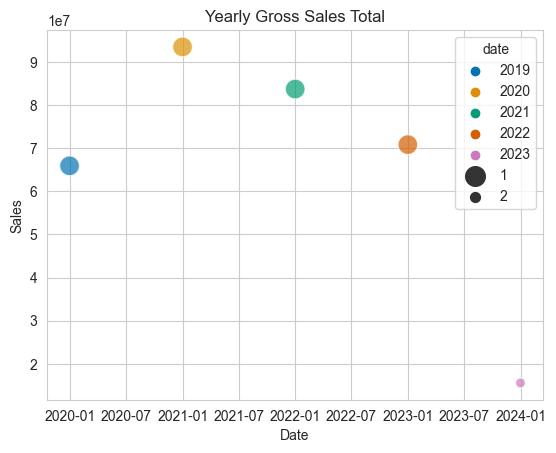

In [108]:
# hide_code_in_slideshow()
# Plot the total sales with different colors for each year
sns.scatterplot(data=yearly_sales, x="date", y="This_year",
                hue=yearly_sales["date"].dt.year, palette="colorblind",
                size=yearly_sales["date"].dt.year.map(lambda y: 2 if y == current_year else 1),
                sizes=[200, 50], alpha=0.7)
plt.title('Yearly Gross Sales Total')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

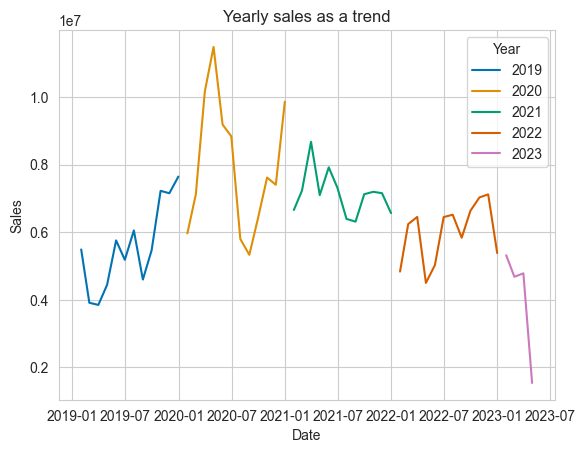

In [109]:
# hide_code_in_slideshow()
#monthly sales
monthly_sales = dfa.resample(on="date", rule="1M").total.sum().rename("This_month").reset_index()
# Extract the year from the date column
monthly_sales["Year"] = monthly_sales["date"].dt.year
# Plot the monthly sales with one color per year
sns.lineplot(data=monthly_sales, x="date", y="This_month", hue="Year", palette="colorblind")
plt.title('Yearly sales as a trend')
plt.xlabel('Date')
plt.ylabel('Sales')
import mplcursors
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"Year: {sel.target[0].year}\nMonth: {sel.target[0].strftime('%B %Y')}\nSales: {sel.target[1]:,.2f}"))
plt.show()

### Can we spot seasonality?

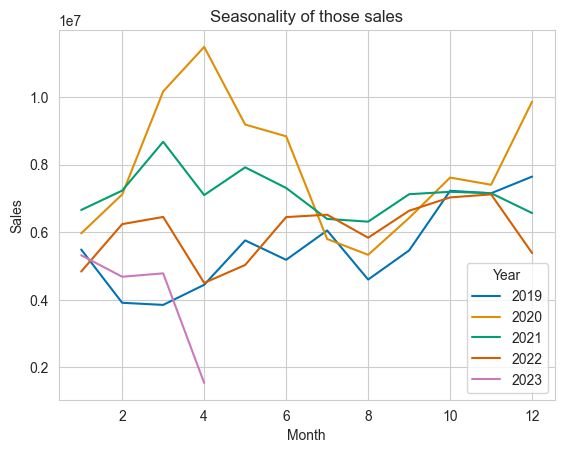

In [110]:
# hide_code_in_slideshow()
monthly_sales = dfa.resample(on="date", rule="1M").total.sum().rename("This_month").reset_index()
monthly_sales["Year"] = monthly_sales["date"].dt.year
monthly_sales["Month"] = monthly_sales["date"].dt.month

sns.set_style("whitegrid")
plot = sns.lineplot(data=monthly_sales, x="Month", y="This_month", hue="Year", palette="colorblind", errorbar=None, estimator=sum)
plt.title('Seasonality of those sales')
plt.xlabel('Month')
plt.ylabel('Sales')
cursor = mplcursors.cursor(plot)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"Year:{sel.artist.get_label()}\nMonth:{sel.target[0]:.0f}\nSales:{sel.target[1]:,.0f}"))
plt.show()

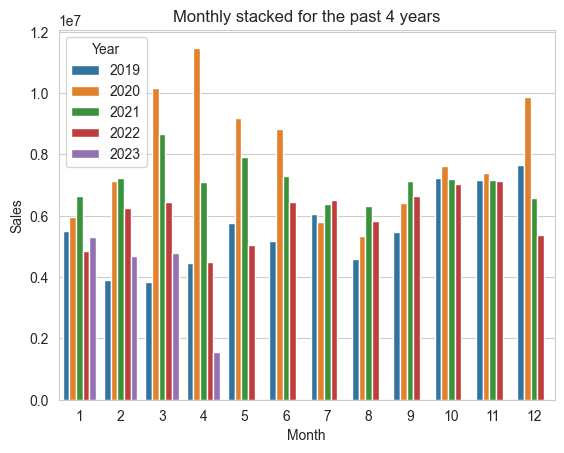

In [111]:
# hide_code_in_slideshow()
sns.barplot(x = "Month", y = "This_month", hue = "Year", data = monthly_sales)
plt.title('Monthly stacked for the past 4 years')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [112]:
monthly_sales.head()

date  This_month  Year  Month
0 2019-01-31   5487615.5  2019      1
1 2019-02-28   3911795.0  2019      2
2 2019-03-31   3848868.0  2019      3
3 2019-04-30   4443242.5  2019      4
4 2019-05-31   5755770.0  2019      5

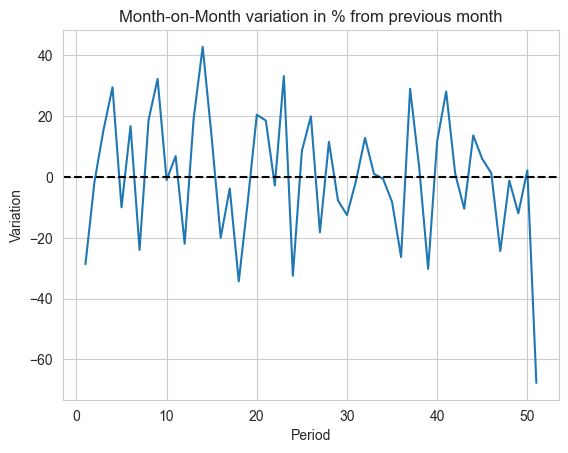

In [113]:
# hide_code_in_slideshow()
#variation MoM
monthly_sales['Variation'] = monthly_sales['This_month'].diff() / monthly_sales['This_month'].shift() * 100
sns.lineplot(data=monthly_sales['Variation'])
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Month-on-Month variation in % from previous month')
plt.xlabel('Period')
plt.ylabel('Variation')
plt.show()

In [114]:
print("Variations MoM :\n\n",monthly_sales[monthly_sales['Variation']<=0].sort_values('Variation').head(10))

Variations MoM :

          date  This_month  Year  Month  Variation
51 2023-04-30  1541774.25  2023      4 -67.762390
18 2020-07-31  5798037.00  2020      7 -34.368725
24 2021-01-31  6656041.00  2021      1 -32.495815
39 2022-04-30  4498764.00  2022      4 -30.257019
1  2019-02-28  3911795.00  2019      2 -28.715940
36 2022-01-31  4834836.00  2022      1 -26.350460
47 2022-12-31  5382629.00  2022     12 -24.369278
7  2019-08-31  4598657.50  2019      8 -23.992235
12 2020-01-31  5964154.00  2020      1 -21.966784
16 2020-05-31  9182609.00  2020      5 -19.997782


In [115]:
df.head()

key_0  id_o       date invoice_number   state_o  customer_company_id  \
28   2339  2339 2019-01-02          14203  complete                  107   
30   2339  2339 2019-01-02          14203  complete                  107   
29   2339  2339 2019-01-02          14203  complete                  107   
48   2340  2340 2019-01-02          14197  complete                   16   
47   2340  2340 2019-01-02          14197  complete                   16   

    id.1_o             name_o      city country_o finance_number  \
28     107  Global Deal d.o.o  Makarska        HR            NaN   
30     107  Global Deal d.o.o  Makarska        HR            NaN   
29     107  Global Deal d.o.o  Makarska        HR            NaN   
48      16    PayThem.Net WLL      Doha        QA            NaN   
47      16    PayThem.Net WLL      Doha        QA            NaN   

    sales_order_id_o  sales_order_id_i   id_i  quantity  product_id  \
28              2339              2339  12478        10         109   
30              2339              2339  12480        15          85   
29              2339              2339  12479         2         158   
48              2340              2340  12498        30          52   
47              2340              2340  12497         5          57   

      state_i  status  created_at                  external_unit_price  \
28  fulfilled       0  2019-01-02  {"amount": 4595, "currency": "USD"}   
30  fulfilled       0  2019-01-02   {"amount": 485, "currency": "USD"}   
29  fulfilled       0  2019-01-02  {"amount": 1800, "currency": "USD"}   
48  fulfilled       0  2019-01-02  {"amount": 4670, "currency": "USD"}   
47  fulfilled       0  2019-01-02  {"amount": 5099, "currency": "USD"}   

    id.1_i         sku                                     name_i  \
28     109  PSN50_1003         PlayStation Network Card $50 (USA)   
30      85  STM05_1002                 Steam Wallet Card $5 (USA)   
29     158    PSP3M_04  PlayStation Plus 3 Month Membership (CAN)   
48      52  STM50_1002                Steam Wallet Card $50 (USA)   
47      57  XB12M_1001             XBOX 12 Month Membership (USA)   

                                  description currency  brand_id  face_price  \
28         PlayStation Network Card $50 (USA)      USD         3       50.00   
30                 Steam Wallet Card $5 (USA)      USD        11        5.00   
29  PlayStation Plus 3 Month Membership (CAN)      USD         3       25.00   
48                Steam Wallet Card $50 (USA)      USD        11       50.00   
47             XBOX 12 Month Membership (USA)      USD         4       59.99   

   country_i     name.1 _merge      price        total  year  month  day  \
28        US       SONY   both  45.950001   459.500000  2019      1    2   
30        US      VALVE   both   4.850000    72.750000  2019      1    2   
29        US       SONY   both  18.000000    36.000000  2019      1    2   
48        US      VALVE   both  46.700001  1401.000000  2019      1    2   
47        US  MICROSOFT   both  50.990002   254.949997  2019      1    2   

      weekday  
28  Wednesday  
30  Wednesday  
29  Wednesday  
48  Wednesday  
47  Wednesday

### SALES MtD - YtD - o/n - vs previous year 

In [116]:
#MtD
from dateutil.relativedelta import relativedelta
now = pd.Timestamp.now()
current_day = pd.Timestamp.now().day
current_month = pd.Timestamp.now().month
current_year = pd.Timestamp.now().year
prev_year = current_year - 1
prev_month = (pd.Timestamp.now() - relativedelta(months=1)).month
two_year = current_year - 2

In [117]:
# hide_code_in_slideshow()
sales_mtd = df[(df['month'] == current_month)&(df['year'] == current_year)]['total'].sum()
sales_mtd_last_year = df[(df['month'] == current_month)&(df['year'] == prev_year)]['total'].sum()
sales_mtd_two_year = df[(df['month'] == current_month)&(df['year'] == two_year)]['total'].sum()
percent_vs_last_year_month = sales_mtd/sales_mtd_last_year
percent_vs_two_year_month = sales_mtd/sales_mtd_two_year

In [118]:
print("Month-to-Date"), print("Sales Amount MtD = ",sales_mtd), print("Pct done vs same month last year = ",percent_vs_last_year_month*100), print("Pct done vs 2 years ago = ",percent_vs_two_year_month*100)

Month-to-Date
Sales Amount MtD =  931926.1
Pct done vs same month last year =  20.910952985286713
Pct done vs 2 years ago =  13.29195499420166


(None, None, None, None)

<BarContainer object of 3 artists>

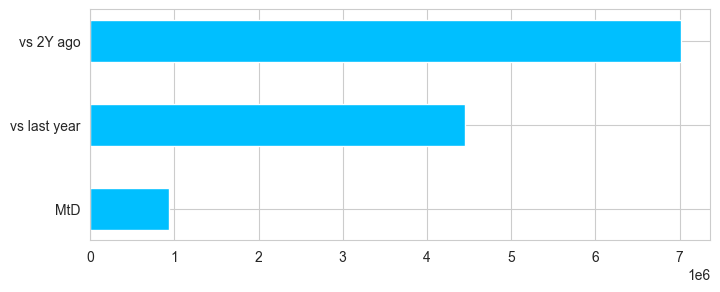

In [119]:
fig, ax = plt.subplots(figsize=(8, 3))
labels = ['MtD','vs last year','vs 2Y ago']
category_names = [sales_mtd, sales_mtd_last_year, sales_mtd_two_year]
ax.barh(labels,category_names, height=0.5, left=None, align='center', color = 'deepskyblue')

In [120]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = percent_vs_last_year_month*100,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "% of MtD vs past year sales"}))

fig.show()

In [121]:
# hide_code_in_slideshow()
# Calculate the YtD for this year
ytd_start = pd.to_datetime(f"{current_year}-01-01")
last_ytd_start = pd.to_datetime(f"{prev_year}-01-01")
last_ytd_end = pd.to_datetime(f"{prev_year}-{current_month}-{current_day}")
two_ytd_start = pd.to_datetime(f"{two_year}-01-01")
two_ytd_end = pd.to_datetime(f"{two_year}-{current_month}-{current_day}")

sales_ytd = df[(df['date'] >= ytd_start)]['total'].sum()
sales_ytd_last_year = df[(df['date'] >=last_ytd_start)& (df['date'] <= last_ytd_end)]['total'].sum()
sales_ytd_two_year = df[(df['date'] >=two_ytd_start)& (df['date'] <= two_ytd_end)]['total'].sum()
percent_vs_last_year_to_date = sales_ytd/sales_ytd_last_year
percent_vs_two_year_to_date = sales_ytd/sales_ytd_two_year 

In [122]:
print("Year-to-Date"), print("Sales Amount YtD = ", sales_ytd) , print("Pct done vs same time last year = ", percent_vs_last_year_to_date), print("Pct done vs 2 year ago = ", percent_vs_two_year_to_date)

Year-to-Date
Sales Amount YtD =  15545794.0
Pct done vs same time last year =  0.85110015
Pct done vs 2 year ago =  0.6364067


(None, None, None, None)

In [123]:
# hide_code_in_slideshow()
# Calculate sales from previous workday day to today (overnight)
from datetime import datetime
today = pd.Timestamp.now().floor('D')
def prev_weekday(adate):
    adate -= timedelta(days=1)
    while adate.weekday() > 4: # Mon-Fri are 0-4
        adate -= timedelta(days=1)
    return adate

overnight_sales = dfa[(dfa['date'] >= prev_weekday(today))]['total'].sum()


In [124]:
print("Overnight Orders, including not Complete"), print("Overnight sales = ", overnight_sales)

Overnight Orders, including not Complete
Overnight sales =  91397.4


(None, None)

### For how long have the customers been with us?

In [125]:
df['prev_order_date'] = df.groupby('sales_order_id_o')['date'].shift(1)

In [126]:
df[df['name_o'] == 'Global Deal d.o.o'].tail()

key_0   id_o       date invoice_number   state_o  customer_company_id  \
63202  12536  12536 2021-07-02          25751  complete                  107   
63203  12536  12536 2021-07-02          25751  complete                  107   
63204  12536  12536 2021-07-02          25751  complete                  107   
63206  12536  12536 2021-07-02          25751  complete                  107   
63199  12536  12536 2021-07-02          25751  complete                  107   

       id.1_o             name_o      city country_o finance_number  \
63202     107  Global Deal d.o.o  Makarska        HR            NaN   
63203     107  Global Deal d.o.o  Makarska        HR            NaN   
63204     107  Global Deal d.o.o  Makarska        HR            NaN   
63206     107  Global Deal d.o.o  Makarska        HR            NaN   
63199     107  Global Deal d.o.o  Makarska        HR            NaN   

       sales_order_id_o  sales_order_id_i   id_i  quantity  product_id  \
63202             12536             12536  75728        15         320   
63203             12536             12536  75729        77        1074   
63204             12536             12536  75730        15         108   
63206             12536             12536  75732         2        1072   
63199             12536             12536  75725        85        1071   

         state_i  status  created_at                  external_unit_price  \
63202  fulfilled       0  2021-07-02  {"amount": 1835, "currency": "USD"}   
63203  fulfilled       0  2021-07-02  {"amount": 1835, "currency": "USD"}   
63204  fulfilled       0  2021-07-02  {"amount": 4555, "currency": "USD"}   
63206  fulfilled       0  2021-07-02  {"amount": 9150, "currency": "USD"}   
63199  fulfilled       0  2021-07-02   {"amount": 920, "currency": "USD"}   

       id.1_i         sku                               name_i  \
63202     320  PSN20_1005   PlayStation Network Card $20 (USA)   
63203    1074       PSN20   PlayStation Network Card $20 (USA)   
63204     108  PSN50_1002   PlayStation Network Card $50 (USA)   
63206    1072      PSN100  PlayStation Network Card $100 (USA)   
63199    1071       PSN10   PlayStation Network Card $10 (USA)   

                               description currency  brand_id  face_price  \
63202   PlayStation Network Card $20 (USA)      USD         3        20.0   
63203   PlayStation Network Card $20 (USA)      USD         3        20.0   
63204   PlayStation Network Card $50 (USA)      USD         3        50.0   
63206  PlayStation Network Card $100 (USA)      USD         3       100.0   
63199   PlayStation Network Card $10 (USA)      USD         3        10.0   

      country_i name.1 _merge      price        total  year  month  day  \
63202        US   SONY   both  18.350000   275.250000  2021      7    2   
63203        US   SONY   both  18.350000  1412.949951  2021      7    2   
63204        US   SONY   both  45.549999   683.250000  2021      7    2   
63206        US   SONY   both  91.500000   183.000000  2021      7    2   
63199        US   SONY   both   9.200000   782.000000  2021      7    2   

      weekday prev_order_date  
63202  Friday      2021-07-02  
63203  Friday      2021-07-02  
63204  Friday      2021-07-02  
63206  Friday      2021-07-02  
63199  Friday      2021-07-02

In [127]:
# hide_code_in_slideshow()
#How long have we got each cust 
customer_length = df.groupby('name_o').agg({'sales_order_id_o': 'nunique','date': ['min', 'max']})
customer_length['longevity'] = customer_length['date']['max'] - customer_length['date']['min']
customer_length

sales_order_id_o       date  \
                                                     nunique        min   
name_o                                                                    
24 Games ApS                                             111 2019-02-08   
2Life Pte Ltd                                             15 2019-02-04   
ABAAD ALJEEL DBA LIKE4CARD                               254 2019-01-03   
ABAAD ALJEEL DBA LIKE4CARD (CAD)                          27 2020-10-07   
ABAAD ALJEEL DBA LIKE4CARD (EUR)                          32 2021-01-04   
ARB Souza Junior Informatica                               3 2021-11-10   
ASIA DIGITAL PTE. LTD.                                   112 2019-02-21   
Alfadia Alalamiya General Trading Co.                      5 2020-01-27   
Anas Al-Shaar                                             65 2019-01-07   
Appeeku Productions                                       23 2019-06-18   
BANANA INTERNATIONAL LTD                                  17 2019-01-11   
BASATNE INTERNATIONAL LLC                                401 2021-03-17   
BGC Digital                                                2 2019-10-30   
BNB CARD CO. LTD                                         138 2019-01-02   
BOLIVIA CARDS                                            192 2019-03-18   
Bamboo Card LLC                                           38 2020-06-12   
Betkat Co. For Trading                                    17 2020-03-19   
BigKidGaming Ltd                                           3 2019-04-30   
Bogdan Vlase                                               2 2022-05-08   
Brandizer (Future Technology Solutions)                  148 2019-01-03   
C2GAMES                                                  215 2019-01-28   
CEDAR PARK SALES LLC                                     362 2019-01-03   
CIRCUIT ZONE CANADA                                        3 2021-09-28   
CIRCUIT ZONE LTD                                          14 2019-08-20   
COLOMBIANUP SAS                                           20 2021-08-24   
CY. TALK SWITZERLAND SA (EUR.)                            16 2021-11-10   
CY. TALK SWITZERLAND SA (USD)                              6 2019-09-20   
Cal Micro                                                128 2019-01-02   
Comercializadora SYP Limitada                             91 2020-05-18   
Comercializadora SYP Limitada (EUR)                        6 2020-10-07   
ContentCard AG                                           200 2019-07-03   
Cybernus, Llc                                              7 2021-01-25   
DEIMAN UNITED LTD                                         68 2019-01-07   
DEVCO FZ LLC                                              10 2023-02-28   
DIGITAL CODES S.p. Z.o.o (EUR.)                           19 2020-09-01   
DIGITAL CODES S.p. Z.o.o (GBP.)                           74 2020-09-01   
DIGITAL CODES S.p. Z.o.o (USD.)                          448 2019-01-07   
DIGITAL GOODS INC                                          1 2021-11-15   
DISTRITECH LLC                                             1 2023-02-27   
Doctors Gaming Alpha                                       2 2020-01-30   
Dorah For Digital Products                                49 2020-03-17   
E3 DISTRIBUTION PTE LTD                                    2 2019-05-10   
EASY GATE PREPAID CARD MANAGEMENT SERVICES                 2 2019-09-19   
EZ CARDS                                                   7 2019-04-05   
EZ Cards Distribution LLC                                  9 2019-02-21   
EZ GAMES DISTRIBUTION INC.                                 1 2022-03-29   
EZ PAY CARDS FZ LLC                                      213 2019-01-14   
ExcelGames Interactive Pte Ltd                            25 2019-03-19   
FJENTERPRISE                                             115 2019-01-02   
Ferdioni Games                                            32 2019-02-11   
Florida State Games                                       48 2019-01-

In [128]:
print("Average longevity of our clients since 2019: ",customer_length.longevity.mean())

Average longevity of our clients since 2019:  723 days 04:27:18.323353296


In [129]:
# hide_code_in_slideshow()
#How long have we got each cust 
customer_snapshot = df.groupby('name_o').agg({'sales_order_id_o': 'nunique','date': ['min', 'max'],'total':'mean'})
customer_snapshot

sales_order_id_o       date  \
                                                     nunique        min   
name_o                                                                    
24 Games ApS                                             111 2019-02-08   
2Life Pte Ltd                                             15 2019-02-04   
ABAAD ALJEEL DBA LIKE4CARD                               254 2019-01-03   
ABAAD ALJEEL DBA LIKE4CARD (CAD)                          27 2020-10-07   
ABAAD ALJEEL DBA LIKE4CARD (EUR)                          32 2021-01-04   
ARB Souza Junior Informatica                               3 2021-11-10   
ASIA DIGITAL PTE. LTD.                                   112 2019-02-21   
Alfadia Alalamiya General Trading Co.                      5 2020-01-27   
Anas Al-Shaar                                             65 2019-01-07   
Appeeku Productions                                       23 2019-06-18   
BANANA INTERNATIONAL LTD                                  17 2019-01-11   
BASATNE INTERNATIONAL LLC                                401 2021-03-17   
BGC Digital                                                2 2019-10-30   
BNB CARD CO. LTD                                         138 2019-01-02   
BOLIVIA CARDS                                            192 2019-03-18   
Bamboo Card LLC                                           38 2020-06-12   
Betkat Co. For Trading                                    17 2020-03-19   
BigKidGaming Ltd                                           3 2019-04-30   
Bogdan Vlase                                               2 2022-05-08   
Brandizer (Future Technology Solutions)                  148 2019-01-03   
C2GAMES                                                  215 2019-01-28   
CEDAR PARK SALES LLC                                     362 2019-01-03   
CIRCUIT ZONE CANADA                                        3 2021-09-28   
CIRCUIT ZONE LTD                                          14 2019-08-20   
COLOMBIANUP SAS                                           20 2021-08-24   
CY. TALK SWITZERLAND SA (EUR.)                            16 2021-11-10   
CY. TALK SWITZERLAND SA (USD)                              6 2019-09-20   
Cal Micro                                                128 2019-01-02   
Comercializadora SYP Limitada                             91 2020-05-18   
Comercializadora SYP Limitada (EUR)                        6 2020-10-07   
ContentCard AG                                           200 2019-07-03   
Cybernus, Llc                                              7 2021-01-25   
DEIMAN UNITED LTD                                         68 2019-01-07   
DEVCO FZ LLC                                              10 2023-02-28   
DIGITAL CODES S.p. Z.o.o (EUR.)                           19 2020-09-01   
DIGITAL CODES S.p. Z.o.o (GBP.)                           74 2020-09-01   
DIGITAL CODES S.p. Z.o.o (USD.)                          448 2019-01-07   
DIGITAL GOODS INC                                          1 2021-11-15   
DISTRITECH LLC                                             1 2023-02-27   
Doctors Gaming Alpha                                       2 2020-01-30   
Dorah For Digital Products                                49 2020-03-17   
E3 DISTRIBUTION PTE LTD                                    2 2019-05-10   
EASY GATE PREPAID CARD MANAGEMENT SERVICES                 2 2019-09-19   
EZ CARDS                                                   7 2019-04-05   
EZ Cards Distribution LLC                                  9 2019-02-21   
EZ GAMES DISTRIBUTION INC.                                 1 2022-03-29   
EZ PAY CARDS FZ LLC                                      213 2019-01-14   
ExcelGames Interactive Pte Ltd                            25 2019-03-19   
FJENTERPRISE                                             115 2019-01-02   
Ferdioni Games                                            32 2019-02-11   
Florida State Games                                       48 2019-01-

In [130]:
print("Average $ spent over all periods ",customer_snapshot['total'].mean())

Average $ spent over all periods  mean    4464.200684
dtype: float32


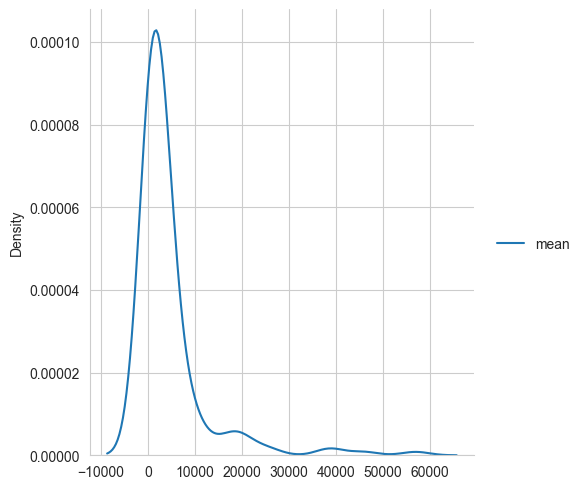

In [131]:
sns.displot(customer_snapshot['total'],
    hue=None,
    weights=None,
    kind='kde',
    legend=True,
    color='deepskyblue',
    height=5,
    aspect=1)

### Periodicity of each customer

In [132]:
#Periodicity of customer order 
customer_orders = df.groupby(['name_o', 'year', 'month', 'weekday']).agg({
    'sales_order_id_o': 'nunique',
    'date': ['min', 'max']
})

In [133]:
# hide_code_in_slideshow()
#search for specific customer
customer_names = customer_orders.index.get_level_values(0).unique()
pd.options.display.max_rows = len(customer_names)
HTML(customer_names.to_frame().to_html(index=False))

In [134]:
from ipywidgets import widgets
from IPython.display import display
# create a text input widget
text_box = widgets.Text(
    value='',
    placeholder='Enter a customer name',
    description='Customer name:',
    disabled=False
)

display(text_box)
user_input = text_box.value

# Display the user's input
print(f'for customer, {user_input}...')

Text(value='', description='Customer name:', placeholder='Enter a customer name')

for customer, ...


In [136]:
customer_name = input()

In [137]:
print("Please enter a customer name: ",customer_name)

Please enter a customer name:  


In [138]:
# hide_code_in_slideshow()
#prompt
customer_name = input("Please enter a customer name: ")
#customer_name= "Global Deal d.o.o"

Please enter a customer name: 


When does he usually order?

In [139]:
customer_orders.loc[customer_name]

KeyError: ''

In [143]:
customer_orders = customer_orders.reset_index()
customer_orders.columns = ['name_o', 'year', 'month', 'weekday', 'orders_count', 'first_order', 'last_order']

In [144]:
customer_orders[customer_orders['name_o']=='ABAAD ALJEEL DBA LIKE4CARD'].tail()

name_o  year  month    weekday  orders_count  \
212  ABAAD ALJEEL DBA LIKE4CARD  2023      1    Tuesday             2   
213  ABAAD ALJEEL DBA LIKE4CARD  2023      2     Monday             1   
214  ABAAD ALJEEL DBA LIKE4CARD  2023      2    Tuesday             2   
215  ABAAD ALJEEL DBA LIKE4CARD  2023      3     Monday             1   
216  ABAAD ALJEEL DBA LIKE4CARD  2023      3  Wednesday             1   

    first_order last_order  
212  2023-01-03 2023-01-17  
213  2023-02-06 2023-02-06  
214  2023-02-14 2023-02-21  
215  2023-03-13 2023-03-13  
216  2023-03-01 2023-03-01

In [145]:
#Periodicity by weekday month year
weekdays = customer_orders.groupby(['name_o', 'weekday']).agg({'orders_count': 'sum'})
months = customer_orders.groupby(['name_o', 'month']).agg({'orders_count': 'sum'})
years = customer_orders.groupby(['name_o', 'year']).agg({'orders_count': 'sum'})

In [146]:
weekdays.head(3)

orders_count
name_o       weekday               
24 Games ApS Friday              28
             Monday              21
             Thursday            21

In [147]:
months.loc[('ABAAD ALJEEL DBA LIKE4CARD')]

orders_count
month              
1                33
2                16
3                27
4                29
5                22
6                26
7                17
8                16
9                16
10               13
11               20
12               19

In [148]:
client_1 = years.loc[('Global Deal d.o.o')].reset_index()
client_1

year  orders_count
0  2019            48
1  2020            10
2  2021             1

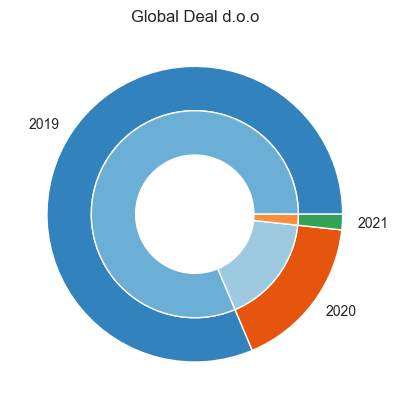

In [149]:
fig, ax = plt.subplots()
size = 0.3

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(x=client_1['orders_count'], labels=client_1['year'],radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(client_1['orders_count'], radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Global Deal d.o.o')
plt.show()

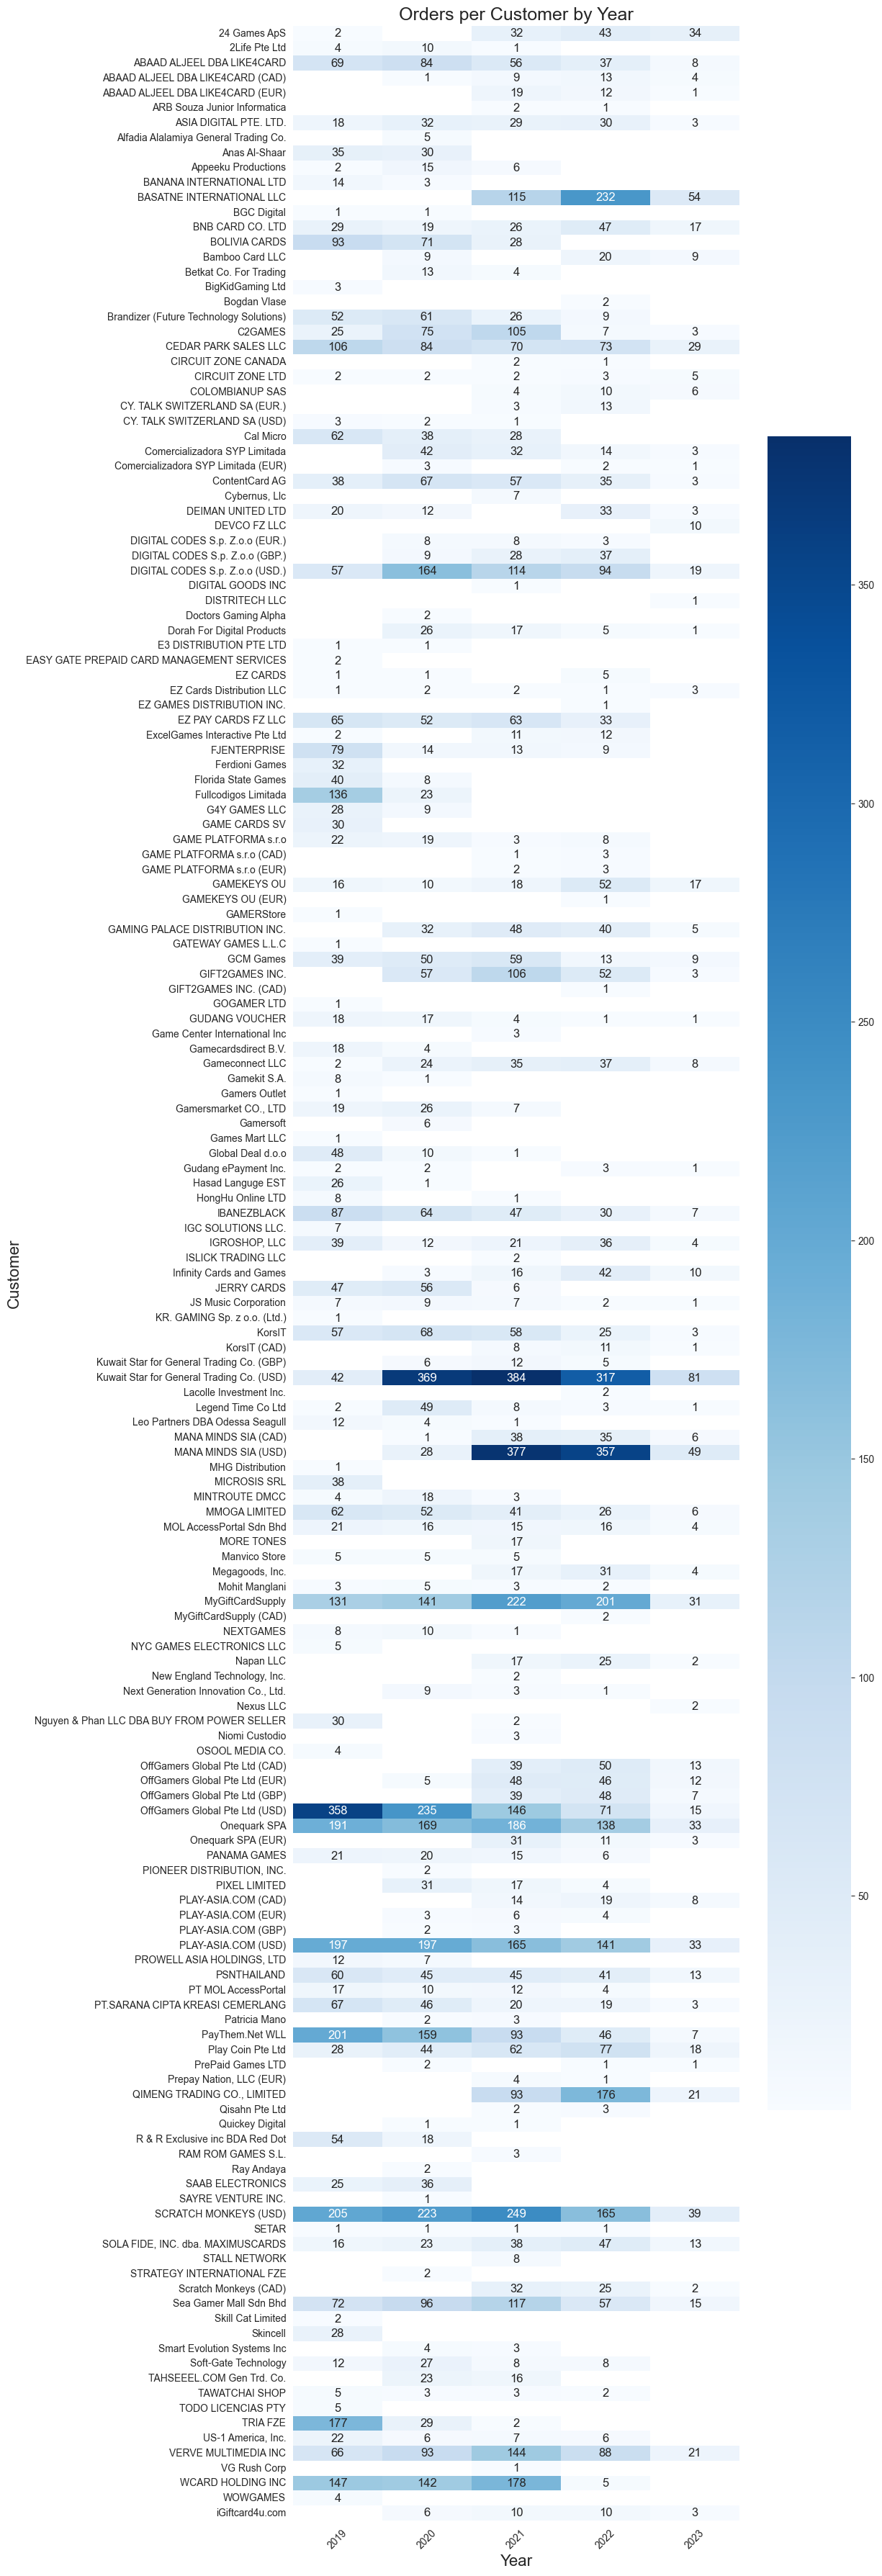

In [150]:
# hide_code_in_slideshow()
#Visu
year_pivot = years.pivot_table(index='name_o', columns='year', values='orders_count')

fig, ax = plt.subplots(figsize=(10, 45))
sns.heatmap(year_pivot, cmap='Blues', annot=True, fmt='g', ax=ax, annot_kws={"size": 12})
plt.title('Orders per Customer by Year', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Customer', fontsize=16)

fig.savefig('heatmap.png')

In [151]:
from IPython.display import IFrame
IFrame(src='./heatmap.png', width=800, height=600, scrolling=True)

In [191]:
# go to the terminal and navigate to the directory where your Jupyter notebook is saved.
# cd Downloads/Python/Dashboard/

# Run the following command to convert your Jupyter notebook to a HTML presentation:
# jupyter-nbextension install rise --py --sys-prefix
# jupyter-nbextension enable rise --py --sys-prefix

# jupyter nbconvert Sales_DB.ipynb --to slides --post serve

In [192]:
# jupyter nbconvert Sales_DB.ipynb --to slides --no-input --post serve

In [ ]:
# {
#  ...
#  "rise": {"scroll": true}
# }